<a href="https://colab.research.google.com/github/tintenderete/TFM-Algoritmo-con-redes-evolutivas/blob/main/modelo_fijo_datos_ibex35.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import yfinance as yf
import pandas as pd
from datetime import datetime, timedelta
import numpy as np
import matplotlib.pyplot as plt

from keras.utils import to_categorical

# DATOS

In [ ]:
symbols = [
"ANA.MC", "ACX.MC", "ACS.MC", "AENA.MC", "AMS.MC", "MTS.MC", "SAB.MC", "BKIA.MC", "BKT.MC", "BBVA.MC", "CABK.MC",
"CLNX.MC", "CIE.MC", "ENG.MC", "ELE.MC", "FER.MC", "GRF.MC", "IAG.MC", "IBE.MC", "ITX.MC", "IDR.MC", "COL.MC",
"MEL.MC", "MRL.MC", "NTGY.MC", "PHM.MC", "REE.MC", "REP.MC", "SGRE.MC", "SLR.MC", "TRE.MC", "TEF.MC", "VIS.MC",
"VWS.CO"
]

In [ ]:
# Descargar datos
start_date = "2016-01-01"
end_date = "2023-01-01"

In [ ]:
data = yf.download(symbols, start=start_date, end=end_date)

[*********************100%***********************]  34 of 34 completed

ERROR:yfinance:
3 Failed downloads:
ERROR:yfinance:['BKIA.MC', 'REE.MC', 'SGRE.MC']: Exception('%ticker%: No timezone found, symbol may be delisted')


In [ ]:
adj_close = data['Adj Close']

In [ ]:
adj_close.shape

(1797, 34)

In [ ]:
adj_close.isna().sum()

ACS.MC        5
ACX.MC        5
AENA.MC       5
AMS.MC        5
ANA.MC        5
BBVA.MC       5
BKIA.MC    1797
BKT.MC        5
CABK.MC       5
CIE.MC        5
CLNX.MC       5
COL.MC        5
ELE.MC        5
ENG.MC        5
FER.MC        5
GRF.MC        5
IAG.MC        5
IBE.MC        5
IDR.MC        5
ITX.MC        5
MEL.MC        5
MRL.MC        5
MTS.MC        5
NTGY.MC       5
PHM.MC        5
REE.MC     1797
REP.MC        5
SAB.MC        5
SGRE.MC    1797
SLR.MC        5
TEF.MC        5
TRE.MC        5
VIS.MC        5
VWS.CO       45
dtype: int64

In [ ]:
adj_close = adj_close.drop(["BKIA.MC", "REE.MC", "SGRE.MC"  ], axis = 1)

In [ ]:
adj_close.isna().sum()

ACS.MC      5
ACX.MC      5
AENA.MC     5
AMS.MC      5
ANA.MC      5
BBVA.MC     5
BKT.MC      5
CABK.MC     5
CIE.MC      5
CLNX.MC     5
COL.MC      5
ELE.MC      5
ENG.MC      5
FER.MC      5
GRF.MC      5
IAG.MC      5
IBE.MC      5
IDR.MC      5
ITX.MC      5
MEL.MC      5
MRL.MC      5
MTS.MC      5
NTGY.MC     5
PHM.MC      5
REP.MC      5
SAB.MC      5
SLR.MC      5
TEF.MC      5
TRE.MC      5
VIS.MC      5
VWS.CO     45
dtype: int64

In [ ]:
adj_close = adj_close.fillna(method="ffill")

In [ ]:
adj_close.isna().sum().sum()

0

In [ ]:
adj_close.shape

(1797, 31)

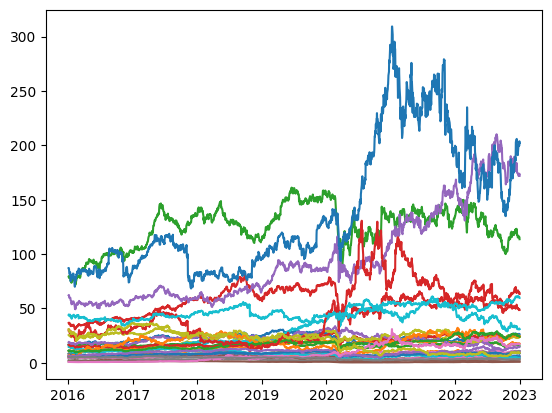

In [ ]:
plt.plot(adj_close);

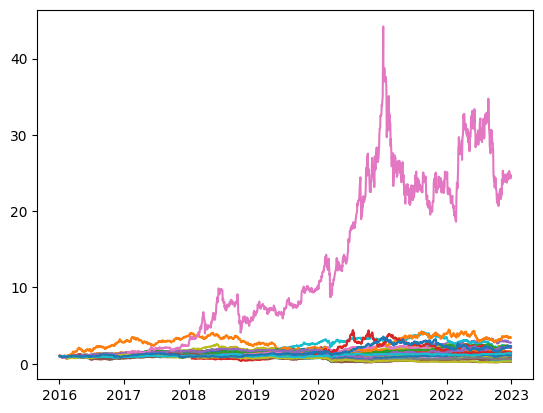

In [ ]:
plt.plot(adj_close/adj_close.iloc[0]);

In [ ]:
adj_close.iloc[500:560].shape

(60, 31)

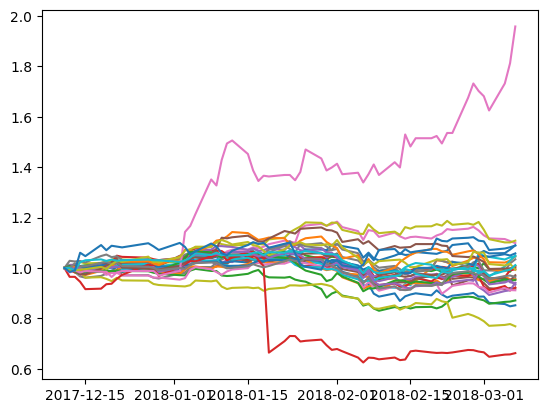

In [ ]:
plt.plot(adj_close.iloc[500:560]/adj_close.iloc[500:560].iloc[0]);

In [ ]:
adj_close.columns

Index(['ACS.MC', 'ACX.MC', 'AENA.MC', 'AMS.MC', 'ANA.MC', 'BBVA.MC', 'BKT.MC',
       'CABK.MC', 'CIE.MC', 'CLNX.MC', 'COL.MC', 'ELE.MC', 'ENG.MC', 'FER.MC',
       'GRF.MC', 'IAG.MC', 'IBE.MC', 'IDR.MC', 'ITX.MC', 'MEL.MC', 'MRL.MC',
       'MTS.MC', 'NTGY.MC', 'PHM.MC', 'REP.MC', 'SAB.MC', 'SLR.MC', 'TEF.MC',
       'TRE.MC', 'VIS.MC', 'VWS.CO'],
      dtype='object')

In [ ]:
adj_close.iloc[0:2, [0,1,2,3,4,5,6,7,8,9]]

,ACS.MC,ACX.MC,AENA.MC,AMS.MC,ANA.MC,BBVA.MC,BKT.MC,CABK.MC,CIE.MC,CLNX.MC
Date,,,,,,,,,,
2016-01-04 00:00:00,16.762016,5.92692,79.277672,36.609085,62.069111,4.407446,4.751968,2.298497,10.778535,14.772964
2016-01-05 00:00:00,16.794477,6.07036,79.734390,36.779480,62.354927,4.436829,4.754171,2.279122,10.822529,14.747094


# def pesos_marko(datos_top, num_portfolios = 1000):

In [ ]:
def pesos_marko(datos_top, num_portfolios = 1000):

  returns = datos_top.pct_change().dropna()
  cov_matrix = returns.cov()
  tickers = datos_top.columns
  # Número de simulaciones de cartera

  # Inicializar arrays para almacenar los resultados de las simulaciones
  portfolio_returns = np.zeros(num_portfolios)
  portfolio_volatilities = np.zeros(num_portfolios)
  portfolio_weights = np.zeros((num_portfolios, len(tickers)))

  # Realizar las simulaciones de cartera
  for i in range(num_portfolios):
      # Generar ponderaciones aleatorias y normalizarlas para que sumen 1
      weights = np.random.random(len(tickers))
      weights /= np.sum(weights)

      # Calcular el rendimiento y la volatilidad de la cartera
      portfolio_return = np.dot(weights, returns.mean()) * 252
      portfolio_volatility = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights))) * np.sqrt(252)

      # Almacenar los resultados
      portfolio_returns[i] = portfolio_return
      portfolio_volatilities[i] = portfolio_volatility
      portfolio_weights[i, :] = weights

  # Supongamos una tasa libre de riesgo del ...
  risk_free_rate = 0.01

  # Calcular el índice de Sharpe para cada cartera simulada
  sharpe_ratios = (portfolio_returns - risk_free_rate) / portfolio_volatilities

  carteras_ordenadas = np.argsort(-sharpe_ratios)

  return portfolio_weights[carteras_ordenadas[0]]

# def calculate_sharpe_ratio(returns, risk_free_rate):

In [ ]:
import numpy as np

def calculate_sharpe_ratio(returns, risk_free_rate):
    """
    Calcular el ratio de Sharpe

    Parámetros:
    returns (np.array): Array de rendimientos de la inversión
    risk_free_rate (float): Tasa de rendimiento sin riesgo

    Devuelve:
    sharpe_ratio (float): Ratio de Sharpe
    """

    # Calcular el rendimiento promedio
    avg_returns = np.mean(returns)

    # Calcular la desviación estándar de los rendimientos
    std_returns = np.std(returns)

    # Calcular el ratio de Sharpe
    sharpe_ratio = (avg_returns - risk_free_rate) / std_returns

    return sharpe_ratio


# def top_n_indices(arr, n):

In [ ]:
import numpy as np

def top_n_indices(arr, n):
    """
    Devuelve los índices de los n mayores elementos en el array.

    Parámetros:
    arr (np.array): Array de entrada
    n (int): Número de índices a devolver

    Devuelve:
    top_indices (np.array): Índices de los n mayores elementos
    """
    # Ordenar los índices en función de los valores en 'arr'
    # 'argsort' devuelve los índices que ordenarían 'arr'
    # '-arr' se usa para ordenar en orden descendente
    sorted_indices = np.argsort(-arr)

    # Devolver los primeros 'n' índices
    top_indices = sorted_indices[:n]

    return top_indices


# def algo_sharpe(data, n_activos_top = 10):

In [ ]:
def algo_sharpe(data, n_activos_top = 10):

  sharpe = calculate_sharpe_ratio(np.log(data / data.shift(1)).dropna(), 0.01)
  top = top_n_indices(sharpe, n_activos_top)

  return top

# def algo_random(n_activos_seleccionados, n_shape):

In [ ]:
def algo_random(n_activos_seleccionados, n_shape):
  return np.random.choice(n_shape, size=n_activos_seleccionados, replace=False)

# def calcular_rendimiento(data, data_forward, activos_seleccionados):

In [ ]:
def calcular_rendimiento(data, data_forward, activos_seleccionados):
  #data = datos_analisis[i-days_backward:i]
  #data_forward = datos_analisis[i:i+days_forward]

  # ALGO RANDOM
  #activos_seleccionados= algo_random(n_activos_seleccionados, data.shape[1])
  #print("activos_seleccionados")
  #print(activos_seleccionados)
  ## CALCULAMOS FRONTERA MARKO
  data_seleccion = data.iloc[:,activos_seleccionados]
  pesos =  pesos_marko(data_seleccion , num_portfolios=num_portfolios)
  #print("pesos")
  #print(pesos)
  ## SELECCIONAMOS RENDIMIENTOS FUTUROS DE ACTIVOS
  data_forward_seleccion= data_forward.iloc[:,activos_seleccionados]
  rendimiento_activos = data_forward_seleccion.iloc[[0,-1],:].pct_change().dropna()
  #print("rendimiento_activos")
  #print(rendimiento_activos)
  ## CALCULAMOS RENDIMIENTOS FUTUROS DE CARTERA
  return ( rendimiento_activos * pesos).sum(axis = 1)


In [ ]:
adj_close.shape

(1797, 31)

In [ ]:
adj_close[1797-500:1797].shape

(500, 31)

# softmax_by_asset

In [ ]:
import tensorflow as tf
from keras import backend as K

def softmax_by_asset(x):
    e = K.exp(x - K.max(x, axis=-1, keepdims=True))
    s = K.sum(e, axis=-1, keepdims=True)
    return e / s

# INVERSION

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:

datos_analisis = adj_close[1797-700:1797]

days_backward = 90
days_forward = 30

n_activos_seleccionados = 10
num_portfolios = 10000

rendimientos = {}
rendimientos["rendimiento_algo_random_1"] = []
rendimientos["rendimiento_algo_random_2"] = []
rendimientos["rendimiento_algo_sharpe_1"] = []
rendimientos["rendimiento_algo_sharpe_2"] = []

i = 0
n_i = 100


for i in range(days_backward, len(datos_analisis), days_forward):
  #print(i-90, i , i + days_forward )

  data = datos_analisis[i-days_backward:i]
  data_forward = datos_analisis[i:i+days_forward]

  # ALGO RANDOM
  activos_seleccionados= algo_random(n_activos_seleccionados, data.shape[1])
  rendimiento = calcular_rendimiento(data, data_forward, activos_seleccionados)
  ## GUARDAMOS RENDIMIENTO
  rendimientos["rendimiento_algo_random_1"].append(rendimiento)

  # ALGO RANDOM
  activos_seleccionados= algo_random(n_activos_seleccionados, data.shape[1])
  rendimiento = calcular_rendimiento(data, data_forward, activos_seleccionados)
  ## GUARDAMOS RENDIMIENTO
  rendimientos["rendimiento_algo_random_2"].append(rendimiento)

  ####

  # ALGO SHARPE
  activos_seleccionados= algo_sharpe(data, n_activos_top = n_activos_seleccionados)
  rendimiento = calcular_rendimiento(data, data_forward, activos_seleccionados)
  ## GUARDAMOS RENDIMIENTO
  rendimientos["rendimiento_algo_sharpe_1"].append(rendimiento)

  # ALGO SHARPE
  activos_seleccionados= algo_sharpe(data, n_activos_top = n_activos_seleccionados)
  rendimiento = calcular_rendimiento(data, data_forward, activos_seleccionados)
  ## GUARDAMOS RENDIMIENTO
  rendimientos["rendimiento_algo_sharpe_2"].append(rendimiento)


KeyboardInterrupt: ignored

In [ ]:
days = []
for i in range(days_backward, len(datos_analisis), days_forward):
  data = datos_analisis[i-days_backward:i]
  data_forward = datos_analisis[i:i+days_forward]
  days.append(data_forward.index[-1].date())
  break
days = np.array(days)

In [ ]:
data.shape

In [ ]:
days

In [ ]:
plt.plot(np.array(rendimientos["rendimiento_algo_random_1"]),   color = 'r');
plt.plot(np.array(rendimientos["rendimiento_algo_random_2"]),   color = 'r');
plt.plot(np.array(rendimientos["rendimiento_algo_sharpe_1"]),   color = 'b');
plt.plot(np.array(rendimientos["rendimiento_algo_sharpe_2"]),   color = 'b');
plt.xticks(np.arange(len(days)), days, rotation=45);

# TO-DO visualizamos los retnornos de cada compra, pero NO el acumulado

# DATOS ANALISIS

# X_DATA y Y_DATA

In [ ]:
adj_close.shape

(1797, 31)

In [ ]:
datos_analisis = adj_close[0:1500]
datos_analisis.shape

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:

days_backward = 150
days_forward = 30
days_steps = 1

X_DATA = []
Y_DATA = []

for i in range(days_backward, len(datos_analisis), days_steps):

  X_data = datos_analisis[i-days_backward:i]
  X_data = np.log(X_data).diff().dropna()
  X_DATA.append(X_data)

  data_forward = datos_analisis[i:i+days_forward]

  rs = calculate_sharpe_ratio(np.log(data_forward).diff().dropna(), 0)
  Y_data = np.argsort(np.argsort(rs))
  #Y_data = Y_data / Y_data.max()
  Y_DATA.append(Y_data)

X_DATA = np.array(X_DATA)
Y_DATA = np.array(Y_DATA)


In [ ]:
X_DATA.shape, Y_DATA.shape

((1350, 149, 31), (1350, 31))

In [ ]:
datos_analisis = adj_close[1500:]

In [ ]:
datos_analisis.shape

(297, 31)

In [ ]:
days_backward = 150
days_forward = 30
days_steps = 1

X_DATA_TEST = []
Y_DATA_TEST = []

for i in range(days_backward, len(datos_analisis), days_steps):

  X_data = datos_analisis[i-days_backward:i]
  X_data = np.log(X_data).diff().dropna()
  X_DATA_TEST.append(X_data)

  data_forward = datos_analisis[i:i+days_forward]

  rs = calculate_sharpe_ratio(np.log(data_forward).diff().dropna(), 0)
  Y_data = np.argsort(np.argsort(rs))
  #Y_data = Y_data / Y_data.max()
  Y_DATA_TEST.append(Y_data)

X_DATA_TEST = np.array(X_DATA_TEST)
Y_DATA_TEST = np.array(Y_DATA_TEST)

In [ ]:
X_DATA.shape, Y_DATA.shape

((1350, 149, 31), (1350, 31))

In [ ]:
X_DATA_TEST.shape, Y_DATA_TEST.shape

((147, 149, 31), (147, 31))

In [ ]:
Y_DATA[0:2]

array([[17,  2, 12, 24, 15, 26, 23, 29, 11, 10,  0,  8,  3, 13,  6, 16,
         7, 21, 14, 19,  5,  1,  9, 20, 25, 18, 28, 22, 30,  4, 27],
       [17,  2, 13, 25, 15, 23, 21, 26, 11,  9,  5,  8,  1, 16,  7, 18,
         6, 28, 14, 19,  3,  0, 10, 24, 20, 12, 29, 22, 30,  4, 27]])

In [ ]:
(Y_DATA[0:2] < 10).astype(int)

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0,
        1, 0, 0, 0, 0, 0, 0, 1, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0,
        1, 0, 0, 0, 0, 0, 0, 1, 1]])

In [ ]:
Y_DATA_CATEGORICAL_SIMPLE = to_categorical((Y_DATA < 10).astype(int))

In [ ]:
Y_DATA_CATEGORICAL_SIMPLE.shape

(1350, 31, 2)

In [ ]:
Y_DATA_CATEGORICAL_SIMPLE[0]

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.]], dtype=float32)

In [ ]:
Y_DATA_CATEGORICAL = to_categorical(Y_DATA)

In [ ]:
X_DATA.shape, Y_DATA.shape

((1350, 149, 31), (1350, 31))

In [ ]:
pd.DataFrame(X_DATA[0])

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
0,0.001935,0.023913,0.005744,0.004644,0.004594,0.006644,0.000463,-0.008465,0.004073,-0.001753,...,0.058618,0.012138,0.038173,-0.008886,-0.003065,0.062304,0.005126,-0.014029,0.009870,0.000000
1,-0.007761,-0.045178,-0.005264,0.002501,-0.002678,-0.021604,-0.022353,-0.036228,-0.024693,-0.011765,...,-0.066971,-0.007535,-0.028492,-0.028999,-0.009871,-0.034133,-0.007244,-0.033673,-0.009870,-0.011641
2,-0.028049,-0.048484,-0.017914,-0.025171,-0.037461,-0.012848,-0.014650,-0.025795,-0.034980,0.001774,...,-0.054774,-0.008954,-0.001929,-0.040452,-0.023840,-0.028171,-0.007703,-0.003660,-0.005425,-0.022391
3,-0.015749,0.007801,0.009239,-0.014580,-0.000663,-0.022848,-0.012428,-0.012473,-0.016679,-0.025121,...,-0.036675,-0.011337,-0.047440,-0.040925,-0.033573,0.000000,-0.024306,-0.027098,-0.018668,-0.022681
4,-0.003465,-0.021453,-0.004852,0.009057,-0.005319,-0.001755,-0.000487,-0.002377,0.002921,-0.006990,...,-0.008635,0.013442,-0.049803,-0.021852,0.009801,-0.007168,-0.013012,-0.011842,0.015945,-0.015713
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144,0.011194,-0.015825,0.001177,0.004106,0.005963,0.017963,0.005445,0.016731,0.014975,0.007550,...,0.010471,0.004897,0.051736,0.009054,0.019868,-0.007273,0.024766,0.027189,0.009481,0.009570
145,-0.012722,0.034404,-0.005505,-0.009357,-0.022437,-0.036254,-0.021472,-0.036534,0.028138,-0.003139,...,-0.000366,0.007301,-0.027691,-0.035827,-0.022380,-0.022141,-0.046265,-0.017982,0.001347,0.011192
146,-0.019879,0.023272,0.017201,0.051425,-0.020375,0.036445,0.018112,0.044128,0.004038,-0.004727,...,0.050617,-0.002968,-0.006501,0.003109,0.024836,-0.015038,0.002855,0.013653,-0.083172,-0.006011
147,-0.008418,-0.016871,-0.001163,0.018052,-0.030427,-0.038035,-0.006431,-0.012990,0.006885,0.001893,...,0.001389,-0.005962,-0.013129,-0.014742,-0.029877,-0.015268,0.002051,0.011505,-0.008289,-0.004316


In [ ]:
import tensorflow as tf

In [ ]:
def loss_ranking(y_true, y_pred, weights = 1):
    y_true = tf.cast(y_true, tf.float32)
    y_pred = tf.cast(y_pred, tf.float32)
    diff = tf.abs(y_true - y_pred)
    loss = tf.reduce_mean(weights * diff)
    return loss


In [ ]:
def loss_ranking(ranking_real, ranking_predicho):
    ranking_real_float = tf.cast(ranking_real, tf.float32)
    ranking_predicho = tf.cast(ranking_predicho, tf.float32)
    diferencias = tf.abs(ranking_real_float - ranking_predicho)
    diferencias_ponderadas = diferencias / (ranking_predicho + 0.01) # <<<<---------
    perdida_total = tf.reduce_sum(diferencias_ponderadas)
    return abs(perdida_total)

# Y discreta

In [ ]:
X_DATA.shape, Y_DATA.shape

((1410, 89, 31), (1410, 31))

In [ ]:
X_DATA[0]

array([[ 0.00193438,  0.02391327,  0.00574447, ..., -0.01402936,
         0.00987009,  0.        ],
       [-0.00776098, -0.04517785, -0.00526446, ..., -0.03367299,
        -0.00987009, -0.01164167],
       [-0.02804853, -0.04848389, -0.0179138 , ..., -0.00365976,
        -0.00542502, -0.02239062],
       ...,
       [-0.00977702,  0.00484979, -0.0089286 , ...,  0.00865801,
        -0.00452964,  0.        ],
       [-0.01548177, -0.04979212,  0.00366221, ..., -0.01196784,
         0.00883465,  0.02951662],
       [ 0.00126917, -0.00315749,  0.00486231, ...,  0.00104635,
        -0.0036889 ,  0.00972154]])

In [ ]:
Y_DATA[0]

array([19, 13,  6, 20,  7, 18, 12,  5, 21, 15, 28,  2, 23, 24, 26, 16, 11,
       10, 30, 14,  8, 22, 27,  1, 25,  3,  4, 17,  0, 29,  9])

In [ ]:
Y_DATA_NORM = Y_DATA  / Y_DATA.max()

In [ ]:
Y_DATA[56]

array([11,  4, 17, 18, 10, 23, 19, 24,  9, 15,  0,  6,  7,  2,  3,  5,  8,
       28, 21, 29, 16, 12, 14, 22, 26, 13, 20, 25, 30,  1, 27])

In [ ]:
Y_DATA_NORM[56]

array([0.36666667, 0.13333333, 0.56666667, 0.6       , 0.33333333,
       0.76666667, 0.63333333, 0.8       , 0.3       , 0.5       ,
       0.        , 0.2       , 0.23333333, 0.06666667, 0.1       ,
       0.16666667, 0.26666667, 0.93333333, 0.7       , 0.96666667,
       0.53333333, 0.4       , 0.46666667, 0.73333333, 0.86666667,
       0.43333333, 0.66666667, 0.83333333, 1.        , 0.03333333,
       0.9       ])

In [ ]:
import keras
from tensorflow.keras.layers import ConvLSTM1D, Dense, Conv2D, LSTM, GRU, Reshape, Dropout
from tensorflow.keras.layers import ConvLSTM2D, Conv3D, TimeDistributed, Flatten
from keras import regularizers

from keras.models import Sequential
from keras.layers import Dense, Conv1D, Flatten, Dropout

inputs = keras.Input(shape=(X_DATA.shape[1:]))
m = inputs
m = GRU(units=200)(m)

#m = Dense(units=50)(m)

m = Flatten()(m)

# Añadir capa Dense de salida
out = Dense(Y_DATA.shape[1], activation='linear')(m)

m = keras.Model(inputs=inputs, outputs=out)

# Compilar el modelo
m.compile(optimizer=keras.optimizers.Adam(learning_rate=0.01), loss=loss_ranking,
        metrics=[])

m.summary()

Model: "model_41"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_42 (InputLayer)       [(None, 149, 31)]         0         
                                                                 
 gru_41 (GRU)                (None, 200)               139800    
                                                                 
 flatten_41 (Flatten)        (None, 200)               0         
                                                                 
 dense_42 (Dense)            (None, 31)                6231      
                                                                 
Total params: 146,031
Trainable params: 146,031
Non-trainable params: 0
_________________________________________________________________


In [ ]:
X_DATA.shape, Y_DATA.shape

((1350, 149, 31), (1350, 31))

In [ ]:
X_DATA[0:1000].shape, X_DATA[1000:].shape

((1000, 149, 31), (350, 149, 31))

In [ ]:
from keras.callbacks import EarlyStopping
"""
También puedes optar por restaurar los mejores pesos encontrados durante el entrenamiento al finalizar el entrenamiento definiendo el argumento restore_best_weights como True:
"""
# early_stop = EarlyStopping(monitor='val_loss', patience=5, mode='min', restore_best_weights=True)


In [ ]:
#h = m.fit(X_DATA,Y_DATA, epochs=1000, batch_size=X_DATA.shape[0], validation_split = 0.5) #batch_size=X_DATA.shape[0]
early_stop = EarlyStopping(monitor='val_loss', patience=1000, mode='min', restore_best_weights=True)
h = m.fit(X_DATA[0:1000],Y_DATA[0:1000],
          epochs=10000,
          batch_size=X_DATA.shape[0],
          validation_data = (X_DATA[1000:], Y_DATA[1000:]),
          callbacks=[early_stop]
          )

Se han truncado las últimas 5000 líneas del flujo de salida.
1/1 [==============================] - 0s 125ms/step - loss: 38516.4141 - val_loss: 11556.7188
Epoch 2840/10000
1/1 [==============================] - 0s 128ms/step - loss: 38507.6523 - val_loss: 11553.6064
Epoch 2841/10000
1/1 [==============================] - 0s 121ms/step - loss: 38498.8906 - val_loss: 11550.4932
Epoch 2842/10000
1/1 [==============================] - 0s 117ms/step - loss: 38490.1328 - val_loss: 11547.3809
Epoch 2843/10000
1/1 [==============================] - 0s 127ms/step - loss: 38481.3672 - val_loss: 11544.2686
Epoch 2844/10000
1/1 [==============================] - 0s 130ms/step - loss: 38472.6094 - val_loss: 11541.1553
Epoch 2845/10000
1/1 [==============================] - 0s 124ms/step - loss: 38463.8438 - val_loss: 11538.0400
Epoch 2846/10000
1/1 [==============================] - 0s 135ms/step - loss: 38455.0859 - val_loss: 11534.9258
Epoch 2847/10000
1/1 [==============================] - 0s 1

In [ ]:
154241.0156

154241.0156

In [ ]:
1344245.1250 > 1

True

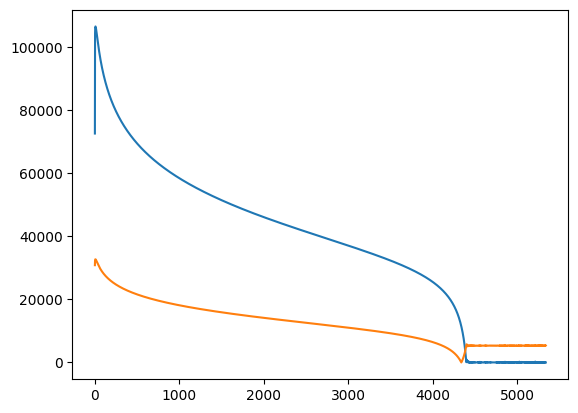

In [ ]:
plt.plot(h.history["loss"])
plt.plot(h.history["val_loss"])

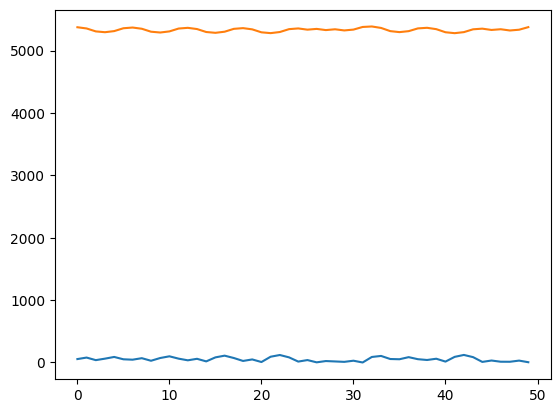

In [ ]:
plt.plot(h.history["loss"][-50:])
plt.plot(h.history["val_loss"][-50:])

In [ ]:
p_test = m(X_DATA_TEST)

In [ ]:
loss_ranking(Y_DATA_TEST, p_test)

<tf.Tensor: shape=(), dtype=float32, numpy=1800.0024>

In [ ]:
p_train = m(X_DATA)

In [ ]:
loss_ranking(Y_DATA, p_train)

<tf.Tensor: shape=(), dtype=float32, numpy=11366.306>

In [ ]:
p_test[0]

<tf.Tensor: shape=(31,), dtype=float32, numpy=
array([  8.208609  ,  -6.025238  ,  19.831108  ,   6.038305  ,
         3.528242  ,  -0.42479485,  19.233322  ,  -5.090647  ,
         4.0506554 ,  -6.714427  ,   9.452314  ,   3.54571   ,
         4.842594  ,   3.5273438 ,   5.819908  ,   4.9864316 ,
        -5.8440304 ,   4.658442  ,   3.3322122 ,   3.7635622 ,
         3.6832657 ,   7.2341137 ,   4.642307  ,  10.9455385 ,
         3.292613  ,   5.444548  ,  15.311541  ,   3.106187  ,
       -11.713426  ,   1.5515562 ,   5.7909126 ], dtype=float32)>

In [ ]:
# START 100 neuronas
# 1 - > (2.7393103, 15.981861)
# 2 -> (10.123219, 26.004683)
# 3 - > (15.026882, 26.003494)

# 200 neuronas
#
np.min(p_test), np.max(p_test)

(-11.7529545, 19.848923)

In [ ]:
np.min(Y_DATA_TEST[0]), np.max(Y_DATA_TEST[0])

(0, 30)

In [ ]:
ranking_pred = np.argsort(np.argsort(p_test[0]))
ranking_pred

array([25,  2, 30, 23, 11,  5, 29,  4, 15,  1, 26, 12, 18, 10, 22, 19,  3,
       17,  9, 14, 13, 24, 16, 27,  8, 20, 28,  7,  0,  6, 21])

In [ ]:
ranking_real = Y_DATA_TEST[0]
ranking_real

array([ 5,  0, 13, 21, 23,  8, 11, 12, 26, 22,  7, 10,  9, 28, 14, 20, 17,
       18, 29,  4, 19,  3, 25, 24,  1,  6, 15, 27,  2, 30, 16])

In [ ]:
idx_activos_cartera_real = np.where(ranking_real < 10)
idx_activos_cartera_real

(array([ 0,  1,  5, 10, 12, 19, 21, 24, 25, 28]),)

In [ ]:
idx_activos_cartera_pred = np.where(ranking_pred < 10)
idx_activos_cartera_pred

(array([ 1,  5,  7,  9, 16, 18, 24, 27, 28, 29]),)

In [ ]:
X_DATA.shape

(1350, 149, 31)

# Y categorica

In [ ]:
!pip install keras-tuner

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 176.1/176.1 kB 4.3 MB/s eta 0:00:00


In [ ]:
import keras
from tensorflow.keras.layers import ConvLSTM1D, Dense, Conv2D, LSTM, GRU, Reshape, Dropout
from tensorflow.keras.layers import ConvLSTM2D, Conv3D, TimeDistributed, Flatten
from keras import regularizers

In [ ]:
X_DATA.shape

(1350, 149, 31)

In [ ]:
Y_DATA_CATEGORICAL_SIMPLE.shape

(1350, 31, 2)

In [ ]:
inputs = keras.Input(shape=(X_DATA.shape[1:]))
m = inputs
m = GRU(units=1)(m)

#m = Dense(units=2)(m)

m = Dropout(0.3)(m)
m = Flatten()(m)

m = Dense(Y_DATA_CATEGORICAL_SIMPLE.shape[1] * Y_DATA_CATEGORICAL_SIMPLE.shape[2] , activation='sigmoid')(m)
m = Reshape((Y_DATA_CATEGORICAL_SIMPLE.shape[1], Y_DATA_CATEGORICAL_SIMPLE.shape[2]))(m)

outputs = keras.layers.Activation(softmax_by_asset)(m)

model = keras.Model(inputs=inputs, outputs=outputs)
model.compile(
    loss='categorical_crossentropy',
    optimizer=keras.optimizers.Adam(learning_rate=0.1),
    metrics=[],
  )

model.summary()

Model: "model_34"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_36 (InputLayer)       [(None, 149, 31)]         0         
                                                                 
 gru_35 (GRU)                (None, 1)                 102       
                                                                 
 dropout_1 (Dropout)         (None, 1)                 0         
                                                                 
 flatten_35 (Flatten)        (None, 1)                 0         
                                                                 
 dense_69 (Dense)            (None, 62)                124       
                                                                 
 reshape_18 (Reshape)        (None, 31, 2)             0         
                                                                 
 activation_18 (Activation)  (None, 31, 2)             0  

In [ ]:
h = model.fit(X_DATA,Y_DATA_CATEGORICAL_SIMPLE,epochs=200, batch_size=X_DATA.shape[0], validation_split = 0.3, shuffle=True)

Epoch 1/200
1/1 [==============================] - 3s 3s/step - loss: 0.6931 - val_loss: 0.6840
Epoch 2/200
1/1 [==============================] - 0s 55ms/step - loss: 0.6815 - val_loss: 0.6746
Epoch 3/200
1/1 [==============================] - 0s 55ms/step - loss: 0.6675 - val_loss: 0.6665
Epoch 4/200
1/1 [==============================] - 0s 52ms/step - loss: 0.6532 - val_loss: 0.6600
Epoch 5/200
1/1 [==============================] - 0s 51ms/step - loss: 0.6416 - val_loss: 0.6559
Epoch 6/200
1/1 [==============================] - 0s 53ms/step - loss: 0.6324 - val_loss: 0.6543
Epoch 7/200
1/1 [==============================] - 0s 55ms/step - loss: 0.6260 - val_loss: 0.6538
Epoch 8/200
1/1 [==============================] - 0s 56ms/step - loss: 0.6204 - val_loss: 0.6537
Epoch 9/200
1/1 [==============================] - 0s 53ms/step - loss: 0.6162 - val_loss: 0.6541
Epoch 10/200
1/1 [==============================] - 0s 55ms/step - loss: 0.6116 - val_loss: 0.6552
Epoch 11/200
1/1 [===

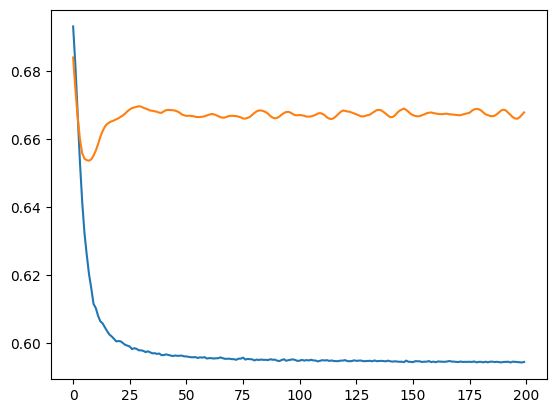

In [ ]:
plt.plot(h.history["loss"])
plt.plot(h.history["val_loss"])

In [ ]:
np.argmax(Y_DATA_CATEGORICAL_SIMPLE[0:1], axis = -1)

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0,
        1, 0, 0, 0, 0, 0, 0, 1, 1]])

In [ ]:
Y_DATA[0:1]

array([[25, 19, 13, 17, 16, 27, 29, 30, 15,  0,  3, 22,  1,  8,  2, 18,
        10,  4, 20,  6, 12, 26,  7, 14, 24, 23, 21, 11, 28,  5,  9]])

In [ ]:
pred = model(X_DATA[0:1])

In [ ]:
pred

In [ ]:
np.argmax(pred, axis = -1)

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
        0, 0, 0, 1, 0, 1, 1, 0, 0]])

In [ ]:
!pip install -q -U keras-tuner
import kerastuner as kt

In [ ]:
import keras
import keras
from tensorflow.keras.layers import ConvLSTM1D, Dense, Conv2D, LSTM, GRU, Reshape, Dropout
from tensorflow.keras.layers import ConvLSTM2D, Conv3D, TimeDistributed, Flatten
from keras import regularizers

In [ ]:
def build_model_1(hp):

  n_units = hp.Int('n_units', min_value = 10, max_value = 100, step = 10)
  n_denses = hp.Choice('n_denses', values = [0,1,2,3 ])
  n_dropput = hp.Choice('n_dropput', values = [0.0, 0.2, 0.3,0.4, 0.5])
  n_l1 = hp.Choice('n_l1', values = [0.001, 0.0001,0.00001, 0.000001])
  n_l2 = hp.Choice('n_l2', values = [0.001, 0.0001,0.00001, 0.000001])
  last_layer_activation = hp.Choice('last_layer_activation', values = ['linear', 'relu', 'sigmoid','tanh'])
  n_learning_rate = hp.Choice('n_learning_rate', values = [0.01, 0.001,0.0001,])

  inputs = keras.Input(shape=(X_DATA.shape[1:]))
  m = inputs

  m = GRU(units=n_units,
                  kernel_regularizer=regularizers.l1_l2(l1=n_l1 , l2=n_l2 ))(m)

  m = keras.layers.Dropout(n_dropput)(m)

  for i in range(n_denses):
    m = Dense(units=n_units,
                    kernel_regularizer=regularizers.l1_l2(l1=n_l1 , l2=n_l2 ))(m)


  m = Flatten()(m)

  m = Dense(Y_DATA_CATEGORICAL.shape[1] * Y_DATA_CATEGORICAL.shape[1] , activation=last_layer_activation)(m)
  m = Reshape((Y_DATA_CATEGORICAL.shape[1], Y_DATA_CATEGORICAL.shape[1]))(m)

  outputs = keras.layers.Activation(softmax_by_asset)(m)

  model = keras.Model(inputs=inputs, outputs=outputs)
  model.compile(
      loss='categorical_crossentropy',
      optimizer=keras.optimizers.Adam(learning_rate=n_learning_rate),
      metrics=['acc'],
    )

  return model



In [ ]:
tuner = kt.RandomSearch(build_model_1,
                        objective='val_acc',
                        max_trials=50,
                        executions_per_trial=3,)

In [ ]:
tuner.search_space_summary()

Search space summary
Default search space size: 7
n_units (Int)
{'default': None, 'conditions': [], 'min_value': 10, 'max_value': 100, 'step': 10, 'sampling': 'linear'}
n_denses (Choice)
{'default': 0, 'conditions': [], 'values': [0, 1, 2, 3], 'ordered': True}
n_dropput (Choice)
{'default': 0.0, 'conditions': [], 'values': [0.0, 0.2, 0.3, 0.4, 0.5], 'ordered': True}
n_l1 (Choice)
{'default': 0.001, 'conditions': [], 'values': [0.001, 0.0001, 1e-05, 1e-06], 'ordered': True}
n_l2 (Choice)
{'default': 0.001, 'conditions': [], 'values': [0.001, 0.0001, 1e-05, 1e-06], 'ordered': True}
last_layer_activation (Choice)
{'default': 'linear', 'conditions': [], 'values': ['linear', 'relu', 'sigmoid', 'tanh'], 'ordered': False}
n_learning_rate (Choice)
{'default': 0.01, 'conditions': [], 'values': [0.01, 0.001, 0.0001], 'ordered': True}


In [ ]:
tuner.search(X_DATA, Y_DATA_CATEGORICAL,
             epochs=50,
             validation_split = 0.3)

Trial 14 Complete [00h 01m 04s]
val_acc: 0.03935889651377996

Best val_acc So Far: 0.040373301754395165
Total elapsed time: 00h 14m 22s

Search: Running Trial #15

Value             |Best Value So Far |Hyperparameter
20                |100               |n_units
3                 |0                 |n_denses
0.4               |0.3               |n_dropput
0.0001            |1e-05             |n_l1
0.0001            |0.001             |n_l2
linear            |tanh              |last_layer_activation
0.001             |0.01              |n_learning_rate

Epoch 1/50
31/31 [==============================] - 3s 38ms/step - loss: 3.4836 - acc: 0.0442 - val_loss: 3.4788 - val_acc: 0.0332
Epoch 2/50
31/31 [==============================] - 0s 11ms/step - loss: 3.4575 - acc: 0.0509 - val_loss: 3.5022 - val_acc: 0.0340
Epoch 3/50
31/31 [==============================] - 0s 11ms/step - loss: 3.4240 - acc: 0.0547 - val_loss: 3.4910 - val_acc: 0.0386
Epoch 4/50
31/31 [==============================

Exception ignored in: <function WeakKeyDictionary.__init__.<locals>.remove at 0x7fb6ac8a2f80>
Traceback (most recent call last):
  File "/usr/lib/python3.10/weakref.py", line 370, in remove
    def remove(k, selfref=ref(self)):
KeyboardInterrupt: 


Epoch 1/50
31/31 [==============================] - 3s 34ms/step - loss: 3.4843 - acc: 0.0427 - val_loss: 3.4795 - val_acc: 0.0325
Epoch 2/50
31/31 [==============================] - 0s 12ms/step - loss: 3.4554 - acc: 0.0511 - val_loss: 3.5027 - val_acc: 0.0330
Epoch 3/50
31/31 [==============================] - 1s 18ms/step - loss: 3.4246 - acc: 0.0558 - val_loss: 3.4961 - val_acc: 0.0402
Epoch 4/50
31/31 [==============================] - 0s 13ms/step - loss: 3.4137 - acc: 0.0574 - val_loss: 3.4956 - val_acc: 0.0367
Epoch 5/50
31/31 [==============================] - 0s 11ms/step - loss: 3.4066 - acc: 0.0577 - val_loss: 3.4873 - val_acc: 0.0358
Epoch 6/50
31/31 [==============================] - 0s 9ms/step - loss: 3.4013 - acc: 0.0579 - val_loss: 3.4918 - val_acc: 0.0368
Epoch 7/50
31/31 [==============================] - 0s 9ms/step - loss: 3.3983 - acc: 0.0575 - val_loss: 3.4847 - val_acc: 0.0326
Epoch 8/50
31/31 [==============================] - 0s 9ms/step - loss: 3.3956 - acc:

KeyboardInterrupt: ignored